In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make():
    os.system("make clean")
    os.system("make")

In [3]:
def lancer_tests_3algos(max_taille,pas,NB_TESTS):
    commande="./exo1 1 {max_taille} {pas} {NB_TESTS}".format(max_taille=max_taille,pas=pas,NB_TESTS=NB_TESTS)
    os.system(commande)
    
def recup_tests_3algos(pas):
    
    
    f_temps = list(open("tests/test_general", "r"))
    
    y_N_temps=[]
    y_K_temps=[]
    y_TC_temps=[]
    
    x_pas=[]
    for i in range(0,len(f_temps)):
        tmp_l=re.findall("\d+\.\d+", f_temps[i])
        
        y_N_temps.append(float(tmp_l[0]))
        y_K_temps.append(float(tmp_l[1]))
        y_TC_temps.append(float(tmp_l[2]))
        
        
        
        
        x_pas.append(pas*(i+1))
        
    
        
        
    l_y=[y_N_temps,y_K_temps,y_TC_temps]
    l_y_noms=["naif","Karatsuba","TC4"]
    
    
    
    return (x_pas,l_y,l_y_noms)

def lancer_tests_algo(max_taille,pas,NB_TESTS):
    commande="./exo1 2 {max_taille} {pas} {NB_TESTS}".format(max_taille=max_taille,pas=pas,NB_TESTS=NB_TESTS)
    os.system(commande)

def recup_tests_algo_naif(pas):
    
    
    f_temps = list(open("tests/test_naif", "r"))
    y_K_temps=[]

    x_pas=[]
    for i in range(0,len(f_temps)):
        tmp_l=re.findall("\d+\.\d+", f_temps[i])
        
        
        y_K_temps.append(float(tmp_l[0]))

        x_pas.append(pas*(i+1))   
        
    l_y=[y_K_temps,]
    l_y_noms=["naif"]
    
    
    
    return (x_pas,l_y,l_y_noms)

def recup_tests_algo_K(pas):
    
    
    f_temps = list(open("tests/test_K", "r"))
    y_K_temps=[]

    x_pas=[]
    for i in range(0,len(f_temps)):
        tmp_l=re.findall("\d+\.\d+", f_temps[i])
        
        
        y_K_temps.append(float(tmp_l[0]))

        x_pas.append(pas*(i+1))   
        
    l_y=[y_K_temps,]
    l_y_noms=["Karatsuba"]
    
    
    
    return (x_pas,l_y,l_y_noms)

def recup_tests_algo_TC(pas):
    
    
    f_temps = list(open("tests/test_TC", "r"))
    y_K_temps=[]

    x_pas=[]
    for i in range(0,len(f_temps)):
        tmp_l=re.findall("\d+\.\d+", f_temps[i])
        
        
        y_K_temps.append(float(tmp_l[0]))

        x_pas.append(pas*(i+1))   
        
    l_y=[y_K_temps,]
    l_y_noms=["TC"]
    
    
    
    return (x_pas,l_y,l_y_noms)

In [76]:
def log_courbe(l):
    return [np.log2(k) for k in l]

def log_courbes(l):
    return [log_courbe(k) for k in l]

def tracer_courbes(x,l_y,l_y_noms,x_label,y_label,title):
    fig, ax = plt.subplots()
    
    for i in range(0,len(l_y)):
        ax.plot(x,l_y[i],label=l_y_noms[i])
    
    plt.legend(loc='upper left')
    ax.set(xlabel=x_label, ylabel=y_label,title=title)
    
    plt.grid()
    fig.savefig("test_karatsuba_log.png")
    plt.show()

In [5]:
make()

rm -f *.o 
gcc -Ofast -Wall  -c exo1.c
gcc -Ofast -Wall  -c fonctions_utilitaires.c
gcc -Ofast -Wall  -c algorithmes.c
gcc -Ofast -Wall  -c test.c
gcc -Ofast -Wall -o exo1 exo1.o test.o fonctions_utilitaires.o algorithmes.o


In [80]:
NB_TESTS=3
pas=10000
max_taille=150000

       

In [81]:
lancer_tests_3algos(max_taille,pas,NB_TESTS)

10000 0.395126 0.437723 0.105569
20000 1.577717 1.345055 0.747454
30000 2.085154 1.369565 0.750544
40000 3.668466 4.066563 0.737856
50000 5.744977 3.999373 0.737211
60000 8.389239 4.120383 0.739402
70000 11.207582 11.911883 5.128320
80000 14.612108 11.920851 5.122450
90000 18.525864 11.912749 5.216477
100000 22.888920 11.872496 5.152002
110000 27.730479 12.003042 5.195800
120000 32.962913 12.029655 5.162977
130000 39.231455 12.233823 5.231299
140000 45.103001 35.019904 5.239926


In [82]:
(x_pas_b,l_y_K,l_y_noms_K) = recup_tests_algo_K(pas)
(x_pas_b_TC,l_y_TC,l_y_noms_TC) = recup_tests_algo_TC(pas)
(x_pas_b,l_y_naif,l_y_noms_naif) = recup_tests_algo_naif(pas)

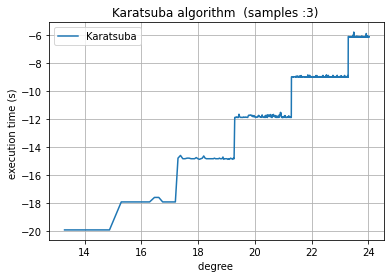

In [83]:
x_label='degree '
y_label='execution time (s) '
title='Karatsuba algorithm  (samples :{essais}) '.format(essais=NB_TESTS)

tmp_courbe=l_y_TC
tmp_label=l_y_noms_K

tracer_courbes(log_courbe(x_pas_b_TC),log_courbes(tmp_courbe),tmp_label,x_label,y_label,title)

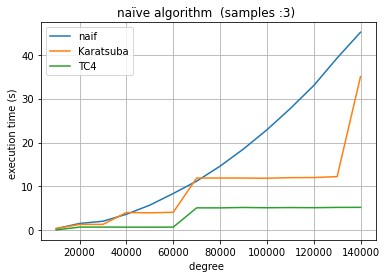

In [84]:
(x_pas,l_y,l_y_noms)=recup_tests_3algos(pas)

x_label='degree '
y_label='execution time (s) '
title='naïve algorithm  (samples :{essais}) '.format(essais=NB_TESTS)
tracer_courbes(x_pas,l_y,l_y_noms,x_label,y_label,title)